# Titanic Project Dataset is a Classification Model

In [1]:
print(('*'*127))
print("                                                      TITANIC PROJECT                                                               ")
print(('*'*127))

*******************************************************************************************************************************
                                                      TITANIC PROJECT                                                               
*******************************************************************************************************************************


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn

from matplotlib import pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

pd.set_option('display.max_rows', 900)
pd.set_option('display.max_columns', 12)
pd.set_option('display.width',100)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [3]:
df.shape

(891, 12)

* We have 899 rows and 12 columns

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

* We have majority int-type for all variables columns and Survived is our target variable which is of int-type 

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* There are Missing values for Cabin(687), Age(177) and Embarked(2) respectively

In [6]:
new_df = df.fillna({
         'Sex':'0',
         'Parch':'0',
         'Cabin':'0',
         'Age':'0',
         'Embarked':'0', 
         })

In [7]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
new_df["Name"]=L.fit_transform(new_df["Name"])
new_df["Sex"]=L.fit_transform(new_df["Sex"])
new_df["Ticket"]=L.fit_transform(new_df["Ticket"])
new_df["Cabin"]=L.fit_transform(new_df["Cabin"])
new_df["Embarked"]=L.fit_transform(new_df["Embarked"])

In [8]:
new_df['Sex'].fillna(new_df.Sex.median(), inplace=True)
new_df['Parch'].fillna(new_df.Parch.median(), inplace=True)
new_df['Cabin'].fillna(new_df.Cabin.median(), inplace=True)
new_df['Age'].fillna(new_df.Age.median(), inplace=True)
new_df['Embarked'].fillna(new_df.Embarked.median(), inplace=True)

In [9]:
pd.set_option('display.max_rows', 900)
pd.set_option('display.max_columns', 12)
pd.set_option('display.width',100)

new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,0,3
1,2,1,1,190,0,38.0,1,0,596,71.2833,82,1
2,3,1,3,353,0,26.0,0,0,669,7.9250,0,3
3,4,1,1,272,0,35.0,1,0,49,53.1000,56,3
4,5,0,3,15,1,35.0,0,0,472,8.0500,0,3
5,6,0,3,554,1,0,0,0,275,8.4583,0,2
6,7,0,1,515,1,54.0,0,0,85,51.8625,130,3
7,8,0,3,624,1,2.0,3,1,395,21.0750,0,3
8,9,1,3,412,0,27.0,0,2,344,11.1333,0,3
9,10,1,2,576,0,14.0,1,0,132,30.0708,0,1


# Dataset Descirption

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine

Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones).

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

# Attributes

Input variables (based on physicochemical tests

---fixed acidity
---volatile acidity
---citric acid
---residual sugar
---chlorides
---free sulfur dioxide
---total sulfur dioxide
---density
---pH
---sulphates
---alcohol


# Skewness Check

In [10]:
new_df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.262862
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Cabin          2.099238
Embarked      -1.270634
dtype: float64

# Transformations

In [11]:
from scipy.stats import skew

In [12]:
new_df['Pclass'] = np.exp(new_df['Pclass'])
PC = new_df["Pclass"]
PC1 = np.exp(new_df["Pclass"])
skew(np.exp(new_df["Pclass"]))

-0.20533862550747461

In [13]:
new_df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.324090
Name           0.000000
Sex           -0.618921
Age            0.262862
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Cabin          2.099238
Embarked      -1.270634
dtype: float64

In [14]:
new_df['Sex'] = np.reciprocal(new_df['Sex'])
S = new_df["Sex"]
S1 = np.reciprocal(new_df["Sex"])
skew(np.reciprocal(new_df["Sex"]))

-0.6178784065548295

In [15]:
new_df['Sex'] = np.sqrt(new_df['Sex'])
S11 = new_df["Sex"]
s22 = np.sqrt(new_df["Sex"])
skew(np.sqrt(new_df["Sex"]))

nan

In [16]:
new_df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.324090
Name           0.000000
Sex            0.000000
Age            0.262862
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Cabin          2.099238
Embarked      -1.270634
dtype: float64

In [17]:
new_df['SibSp'] = np.reciprocal(new_df['SibSp'])
SS = new_df["SibSp"]
SS1 = np.reciprocal(new_df["SibSp"])
skew(np.reciprocal(new_df["SibSp"]))

-3.021773620895242

In [18]:
new_df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.324090
Name           0.000000
Sex            0.000000
Age            0.262862
SibSp          0.784821
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Cabin          2.099238
Embarked      -1.270634
dtype: float64

In [19]:
new_df['Parch'] = np.reciprocal(new_df['Parch'])
SS = new_df["Parch"]
SS1 = np.reciprocal(new_df["Parch"])
skew(np.reciprocal(new_df["Parch"]))

-2.5491751807377607

In [20]:
new_df['Parch'] = np.sqrt(new_df['Parch'])
SS11 = new_df["Parch"]
SS22 = np.sqrt(new_df["Parch"])
skew(np.sqrt(new_df["Parch"]))

nan

In [21]:
new_df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.324090
Name           0.000000
Sex            0.000000
Age            0.262862
SibSp          0.784821
Parch         -0.218776
Ticket         0.000246
Fare           4.787317
Cabin          2.099238
Embarked      -1.270634
dtype: float64

In [22]:
new_df['Fare'] = np.log(new_df['Fare'])
F = new_df["Fare"]
F1 = np.log(new_df["Fare"])
skew(np.log(new_df["Fare"]))

nan

In [23]:
new_df['Fare'] = np.reciprocal(new_df['Fare'])
F11 = new_df["Fare"]
F22 = np.reciprocal(new_df["Fare"])
skew(np.reciprocal(new_df["Fare"]))

nan

In [24]:
new_df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.324090
Name           0.000000
Sex            0.000000
Age            0.262862
SibSp          0.784821
Parch         -0.218776
Ticket         0.000246
Fare          -0.491964
Cabin          2.099238
Embarked      -1.270634
dtype: float64

In [25]:
new_df['Cabin'] = np.reciprocal(new_df['Cabin'])
C = new_df["Cabin"]
C1 = np.reciprocal(new_df["Cabin"])
skew(np.reciprocal(new_df["Cabin"]))

-1.2977752891434011

In [26]:
new_df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.324090
Name           0.000000
Sex            0.000000
Age            0.262862
SibSp          0.784821
Parch         -0.218776
Ticket         0.000246
Fare          -0.491964
Cabin          1.292367
Embarked      -1.270634
dtype: float64

In [27]:
new_df['Embarked'] = np.exp(new_df['Embarked'])
E = new_df["Embarked"]
E1 = np.exp(new_df["Embarked"])
skew(np.exp(new_df["Embarked"]))

-0.9954033464288451

In [28]:
new_df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.324090
Name           0.000000
Sex            0.000000
Age            0.262862
SibSp          0.784821
Parch         -0.218776
Ticket         0.000246
Fare          -0.491964
Cabin          1.292367
Embarked      -1.074420
dtype: float64

# EDA

# Displot

<AxesSubplot:xlabel='PassengerId', ylabel='Density'>

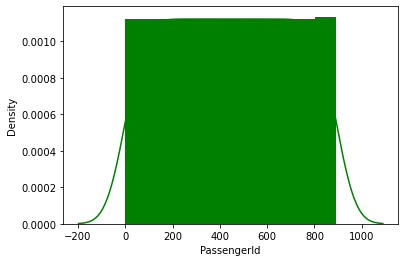

In [29]:
sn.distplot(new_df["PassengerId"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='Survived', ylabel='Density'>

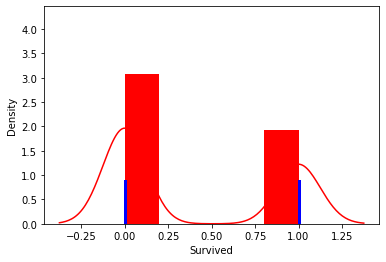

In [30]:
sn.distplot(new_df["Survived"], hist_kws={'alpha':1}, color='r', rug=True, rug_kws={"color": "b", "alpha": 0.5, "linewidth": 3, "height":0.2})

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

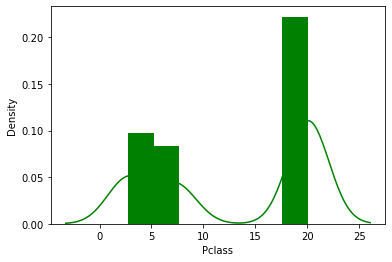

In [31]:
sn.distplot(new_df["Pclass"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='Sex', ylabel='Density'>

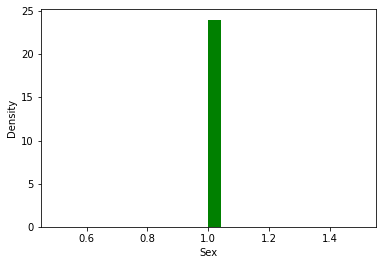

In [32]:
sn.distplot(new_df["Sex"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='Age', ylabel='Density'>

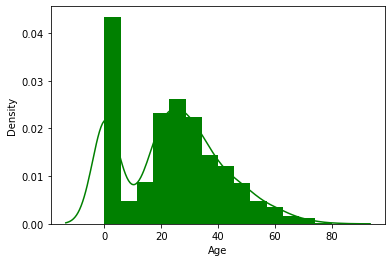

In [33]:
sn.distplot(new_df["Age"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

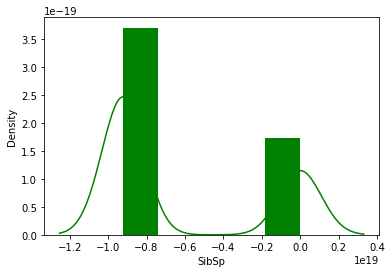

In [34]:
sn.distplot(new_df["SibSp"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='Parch', ylabel='Density'>

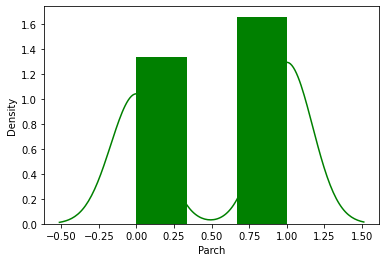

In [35]:
sn.distplot(new_df["Parch"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='Ticket', ylabel='Density'>

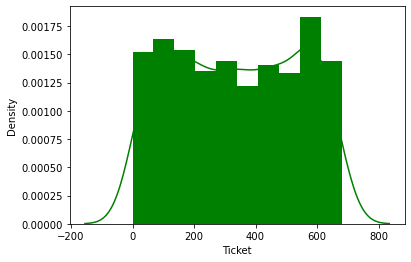

In [36]:
sn.distplot(new_df["Ticket"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='Fare', ylabel='Density'>

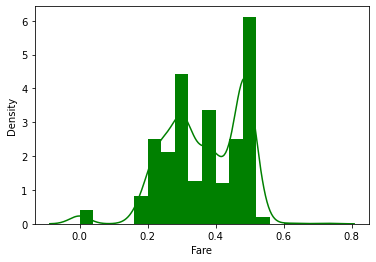

In [37]:
sn.distplot(new_df["Fare"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='Cabin', ylabel='Density'>

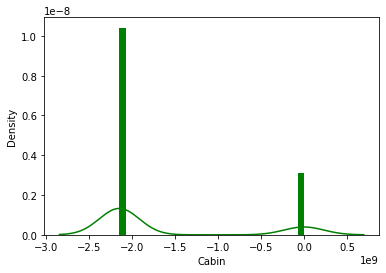

In [38]:
sn.distplot(new_df["Cabin"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='Embarked', ylabel='Density'>

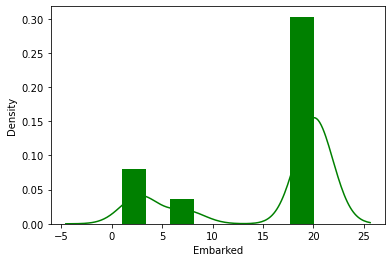

In [39]:
sn.distplot(new_df["Embarked"], hist_kws={'alpha':1}, color='g')

* Here we observe that after removing the skewness data on Sibsp has still mild skewness also with Cabin and Embarked Columns after chossing the best transformation we are still able to find Moderate Skewness.

# Outliers Detection using BoxPlot

<AxesSubplot:xlabel='PassengerId'>

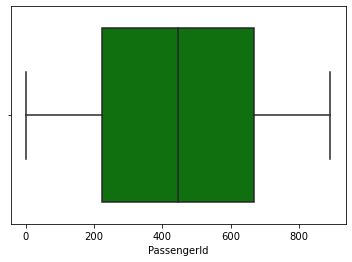

In [40]:
sn.boxplot(new_df["PassengerId"], color='g')

<AxesSubplot:xlabel='Survived'>

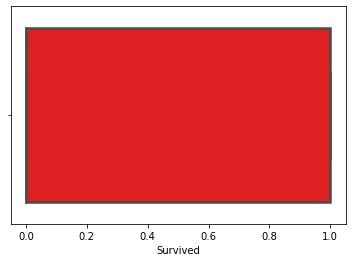

In [41]:
sn.boxplot(new_df["Survived"], color='r', linewidth=2.5)

<AxesSubplot:xlabel='Pclass'>

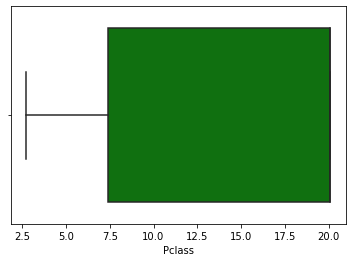

In [42]:
sn.boxplot(new_df["Pclass"], color='g')

<AxesSubplot:xlabel='Sex'>

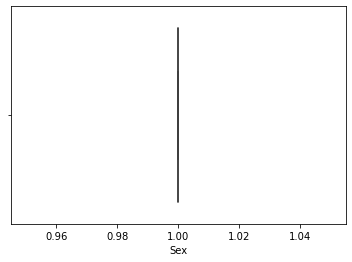

In [43]:
sn.boxplot(new_df["Sex"])

<AxesSubplot:xlabel='Age'>

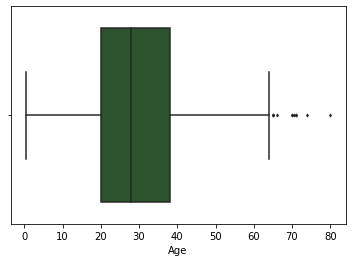

In [44]:
sn.boxplot(x = df["Age"], color='g', saturation=0.3, fliersize=2)

<AxesSubplot:xlabel='SibSp'>

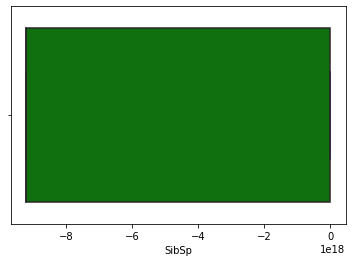

In [45]:
sn.boxplot(new_df["SibSp"], color='g')

<AxesSubplot:xlabel='Parch'>

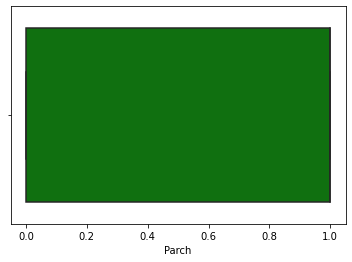

In [46]:
sn.boxplot(new_df["Parch"], color='g')

<AxesSubplot:xlabel='Ticket'>

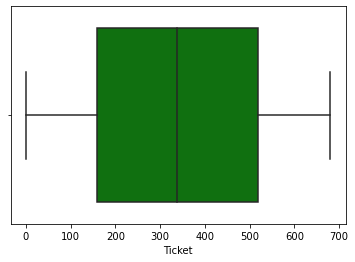

In [47]:
sn.boxplot(new_df["Ticket"], color='g')

<AxesSubplot:xlabel='Fare'>

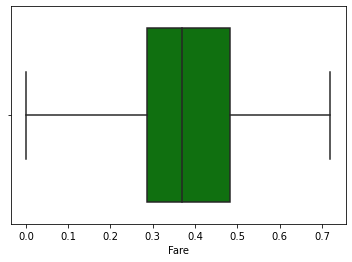

In [48]:
sn.boxplot(new_df["Fare"], color='g')

<AxesSubplot:xlabel='Cabin'>

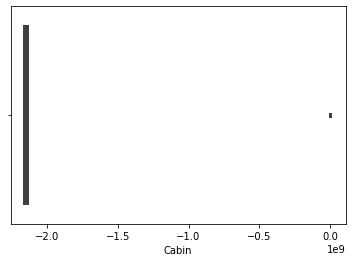

In [49]:
sn.boxplot(new_df["Cabin"], fliersize=2, linewidth=6)

<AxesSubplot:xlabel='Embarked'>

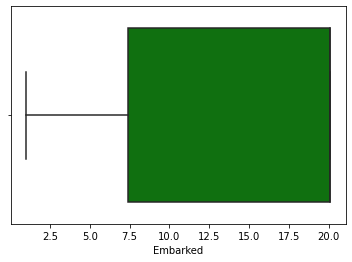

In [50]:
sn.boxplot(new_df["Embarked"], color='g')

* Here we observe mild Outlier for Column ['Cabin'] and Many Outlier for Column ['Age']

# Scatterplot

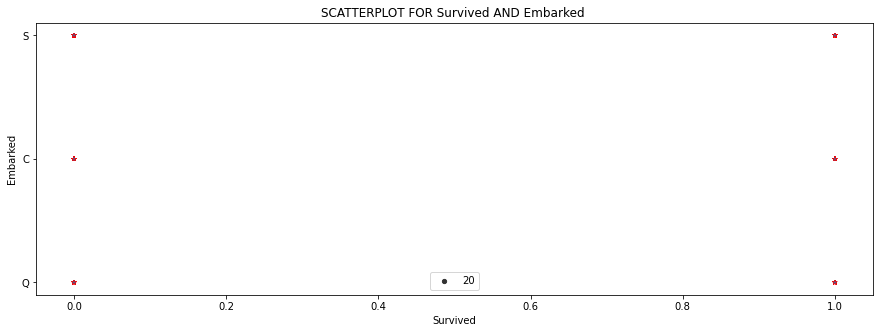

In [51]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Survived AND Embarked ')

sn.scatterplot(df['Survived'], df['Embarked'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that many who have embarked from Southampton, Cherbourg, and Queenstown has equal distribution of Survivors and Non - Survivors

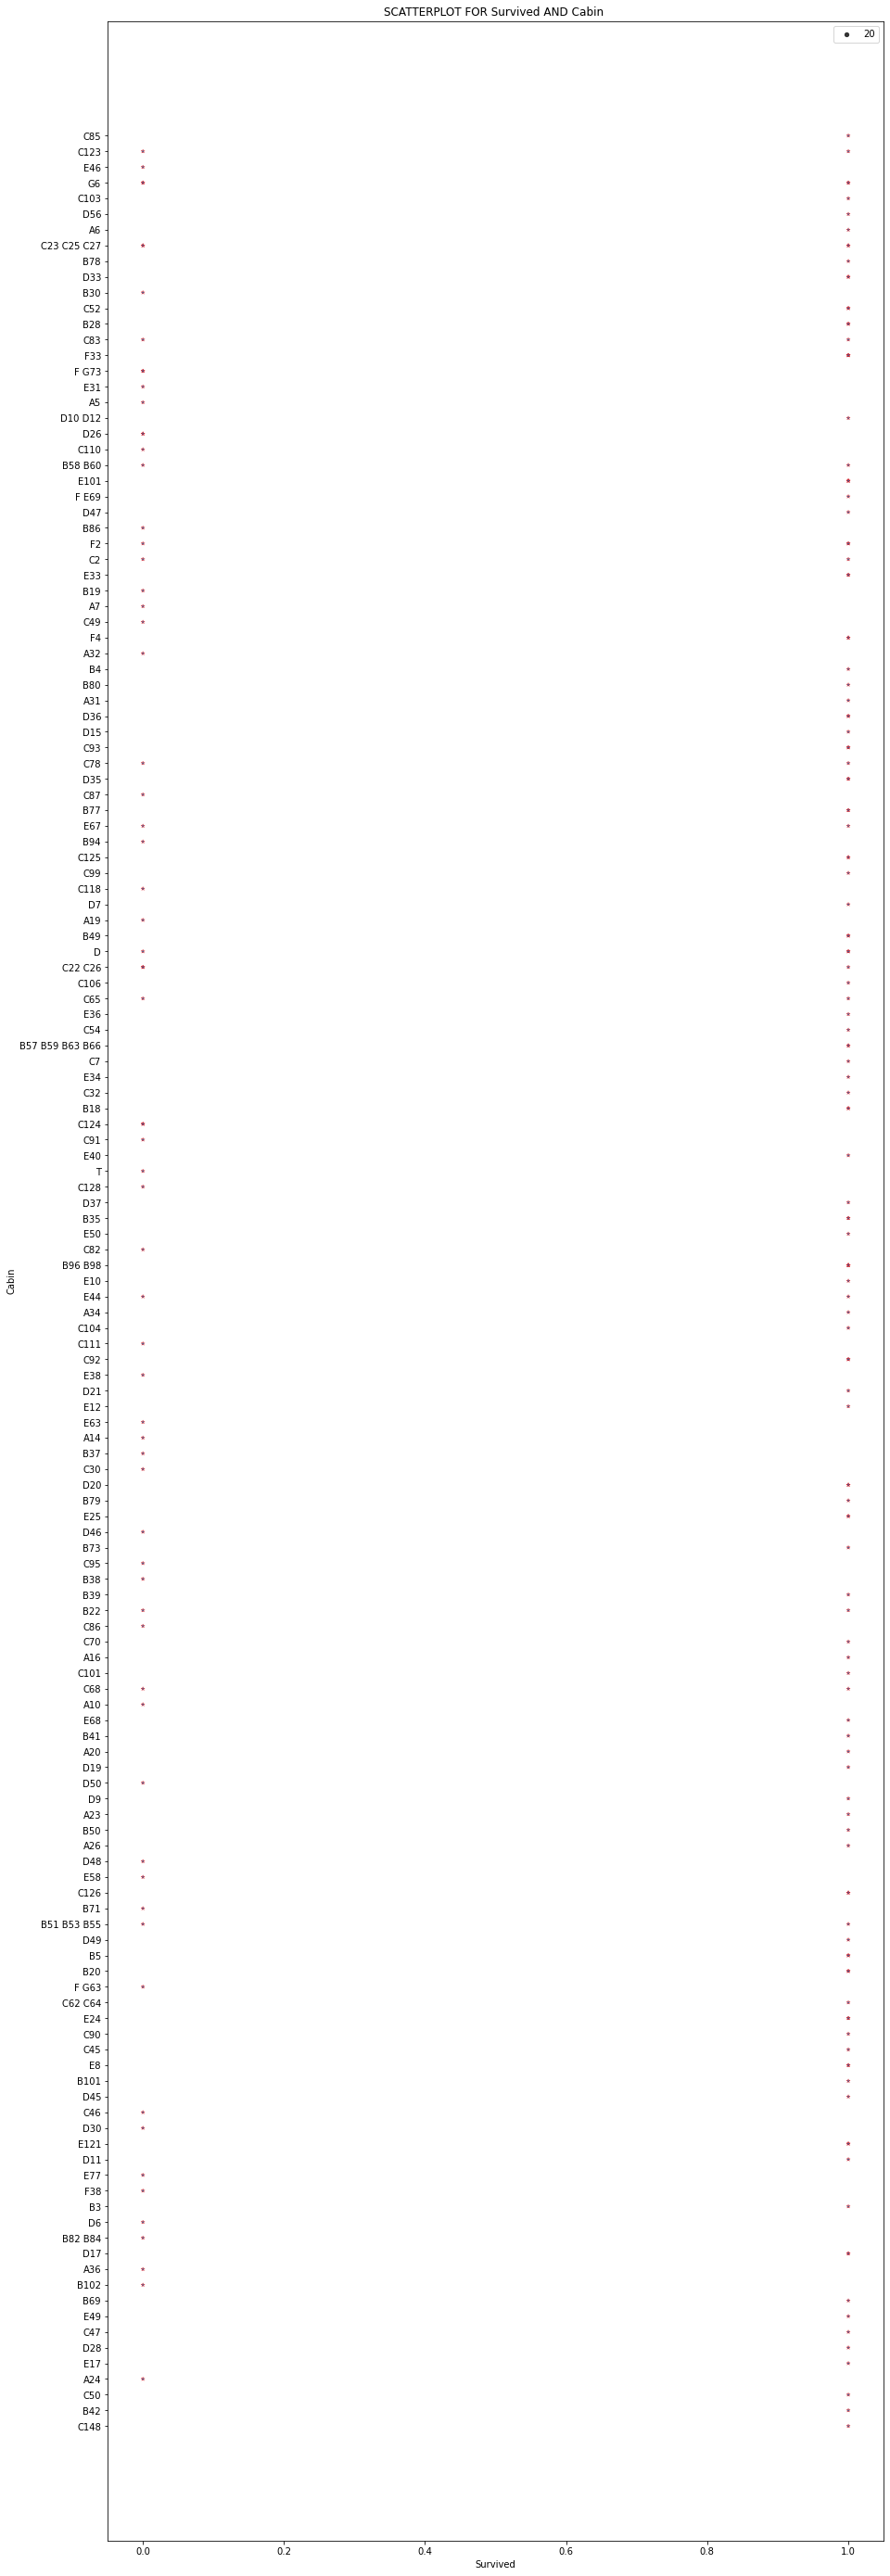

In [52]:
plt.figure(figsize=[15,50])

plt.title('SCATTERPLOT FOR Survived AND Cabin ')

sn.scatterplot(df['Survived'], df['Cabin'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that majority of the A,E,C class cabin had More Survivors

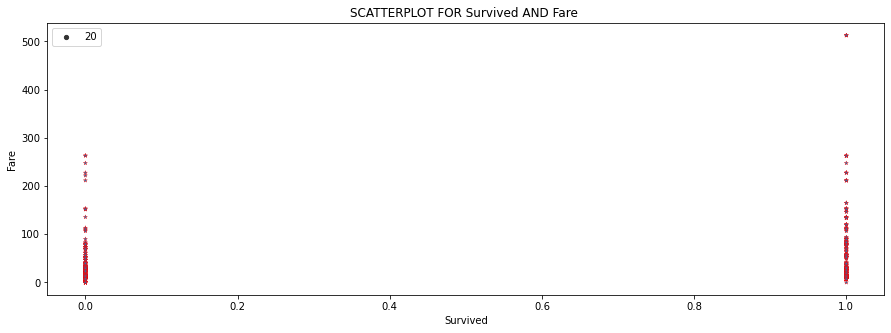

In [53]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Survived AND Fare ')

sn.scatterplot(df['Survived'], df['Fare'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that Ticket fare from 100 to 250 have equal data on survived and non - survived

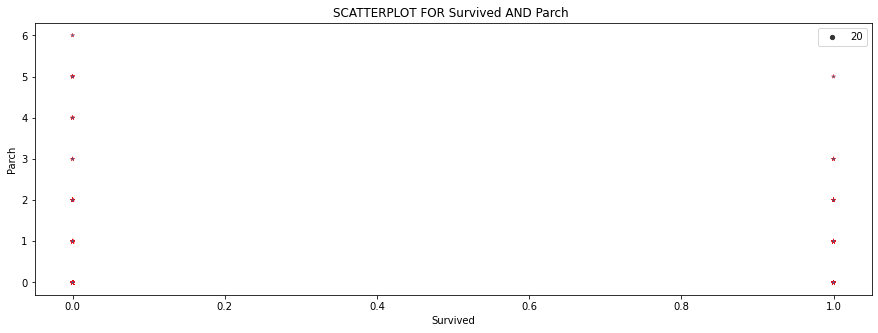

In [54]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Survived AND Parch ')

sn.scatterplot(df['Survived'], df['Parch'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that No of Children and Parents aboard who were able to survive wasa from 0 to 3

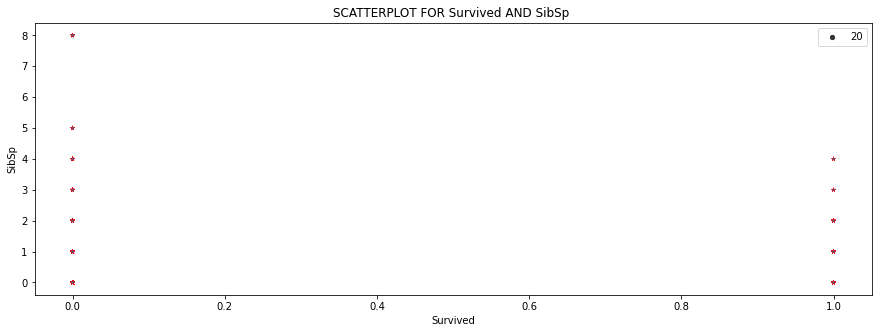

In [55]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Survived AND SibSp ')

sn.scatterplot(df['Survived'], df['SibSp'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that majority of the couples who had siblings from 0 to 4 was able to survive with family.

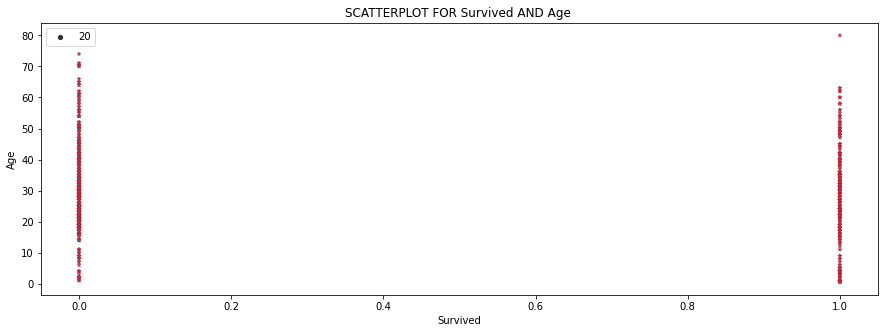

In [56]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Survived AND Age ')

sn.scatterplot(df['Survived'], df['Age'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that Mjority of those who susrvived were between age 10 - 65

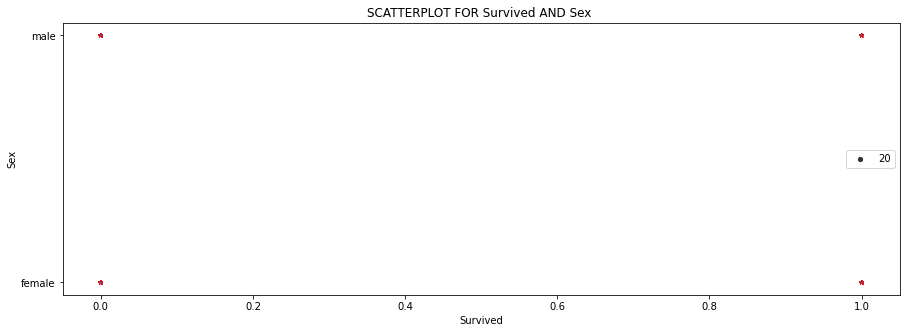

In [57]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Survived AND Sex ')

sn.scatterplot(df['Survived'], df['Sex'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that both Male and Female had Survived and Non-Survived

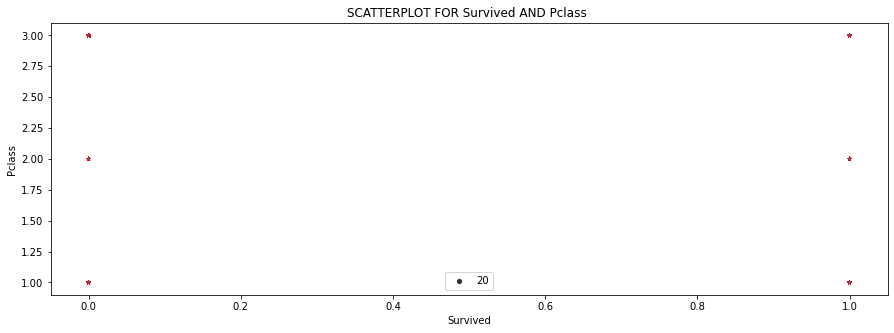

In [58]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Survived AND Pclass ')

sn.scatterplot(df['Survived'], df['Pclass'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that all types of Passenger class bookings has data on Survived and Non-Survived

# Pairplot

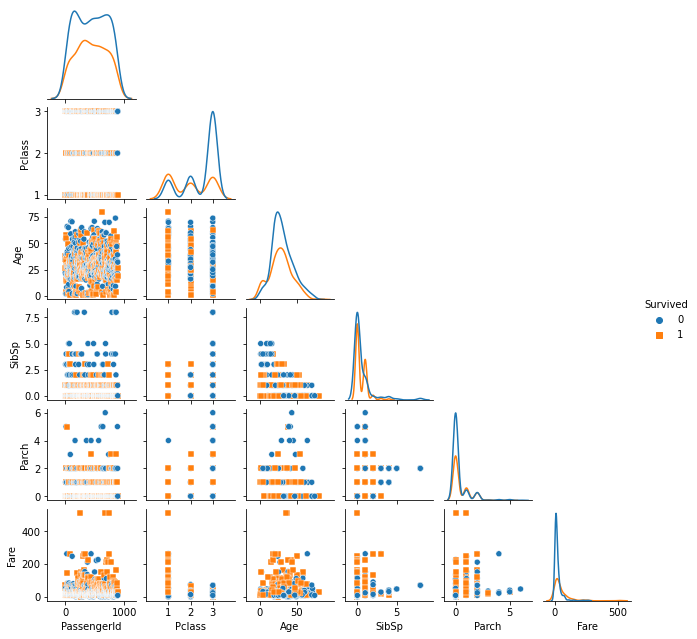

In [59]:
sn.pairplot(df, hue="Survived", height=1.5, markers=["o", "s"], corner=True, diag_kws=dict(fill=False))

* Here we observe that Age group has a well distribution of data on survived state and has almost equal distribution

# Catplot

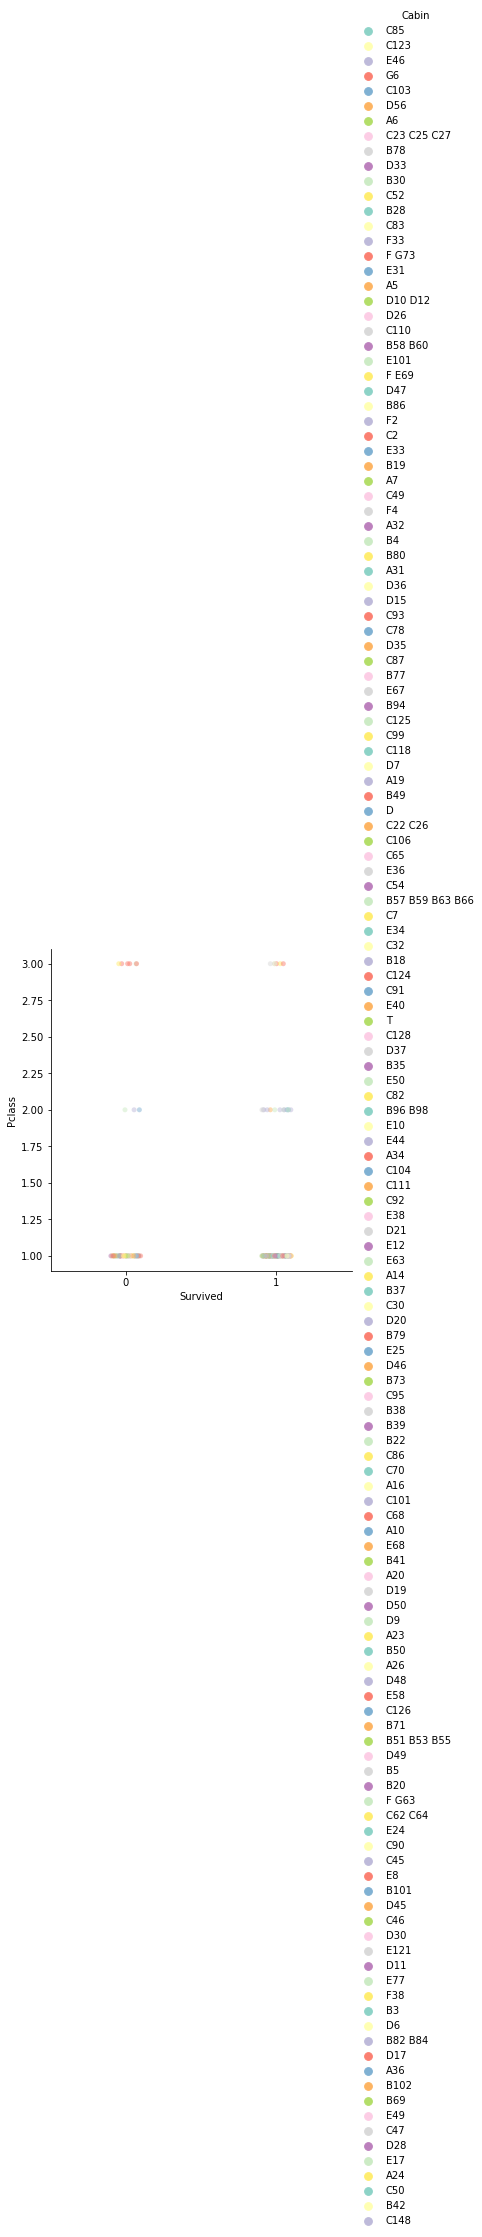

In [60]:
sn.catplot(x="Survived", y="Pclass", kind='strip',data=df, alpha=0.5, color='k', palette="Set3", hue="Cabin")

* Here we observe that Pclass 1 has equal distribution of data for both Survived and non Survived and are mostly having equal cabin data too

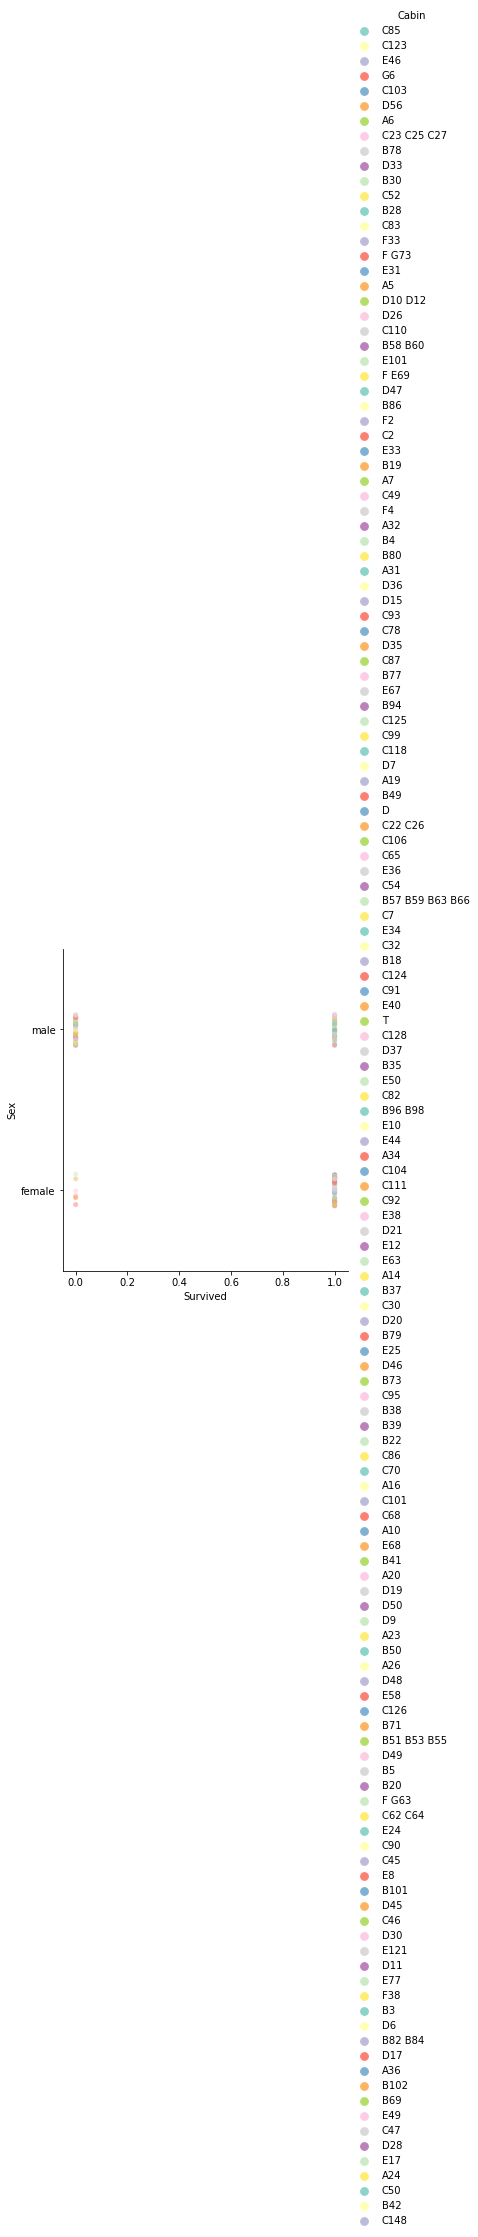

In [61]:
sn.catplot(x="Survived", y="Sex", kind='strip',data=df, alpha=0.5, color='k', palette="Set3", hue="Cabin")

* Here we observe that mostly female passengers who did not survive and in cabin with pink dots c90 A20 D49 D39

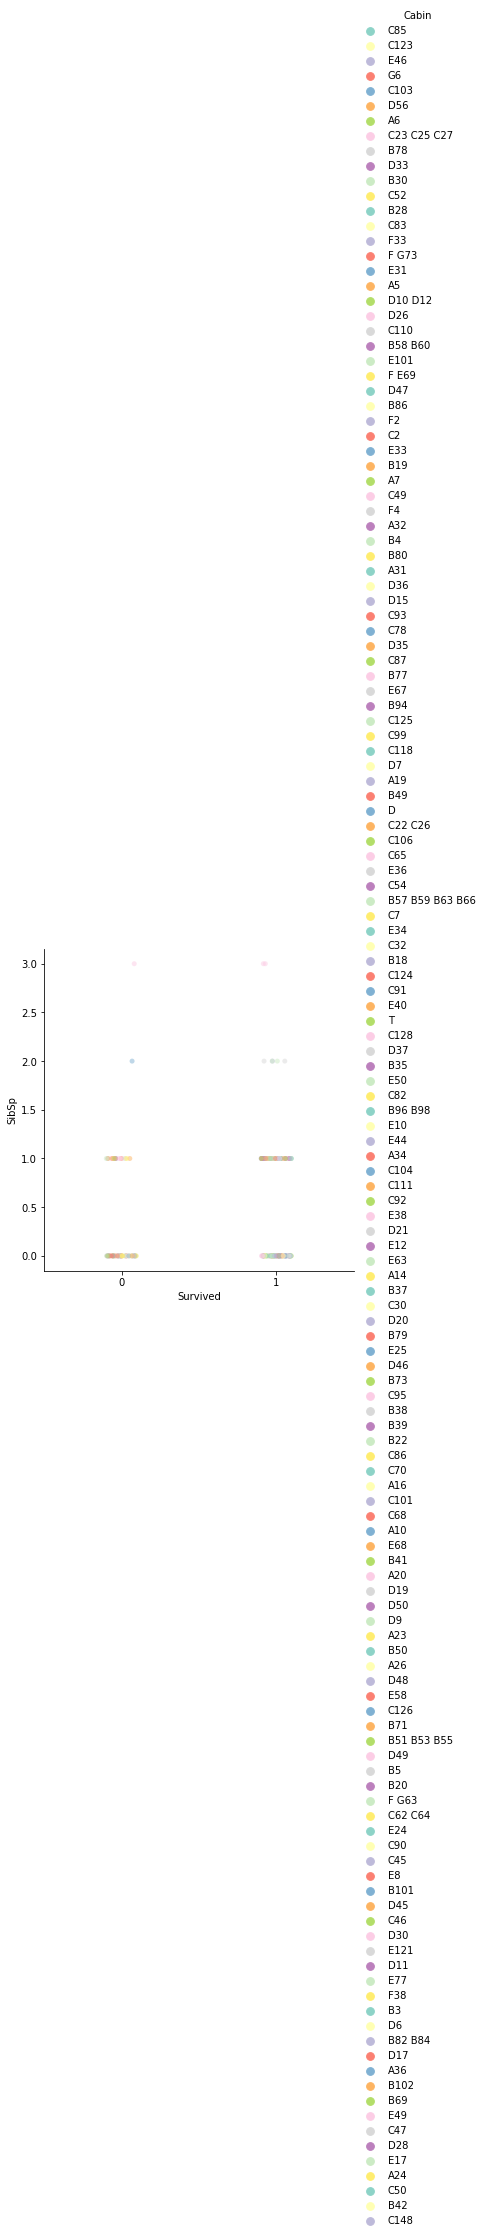

In [62]:
sn.catplot(x="Survived", y="SibSp", kind='strip',data=df, alpha=0.5, color='k', palette="Set3", hue="Cabin")

* Here we observe that majority of the Siblings who have not survived and survived are on the 0 side where parents have no siblings and majority of siblingss 3 are on the survived side in light pink cabins

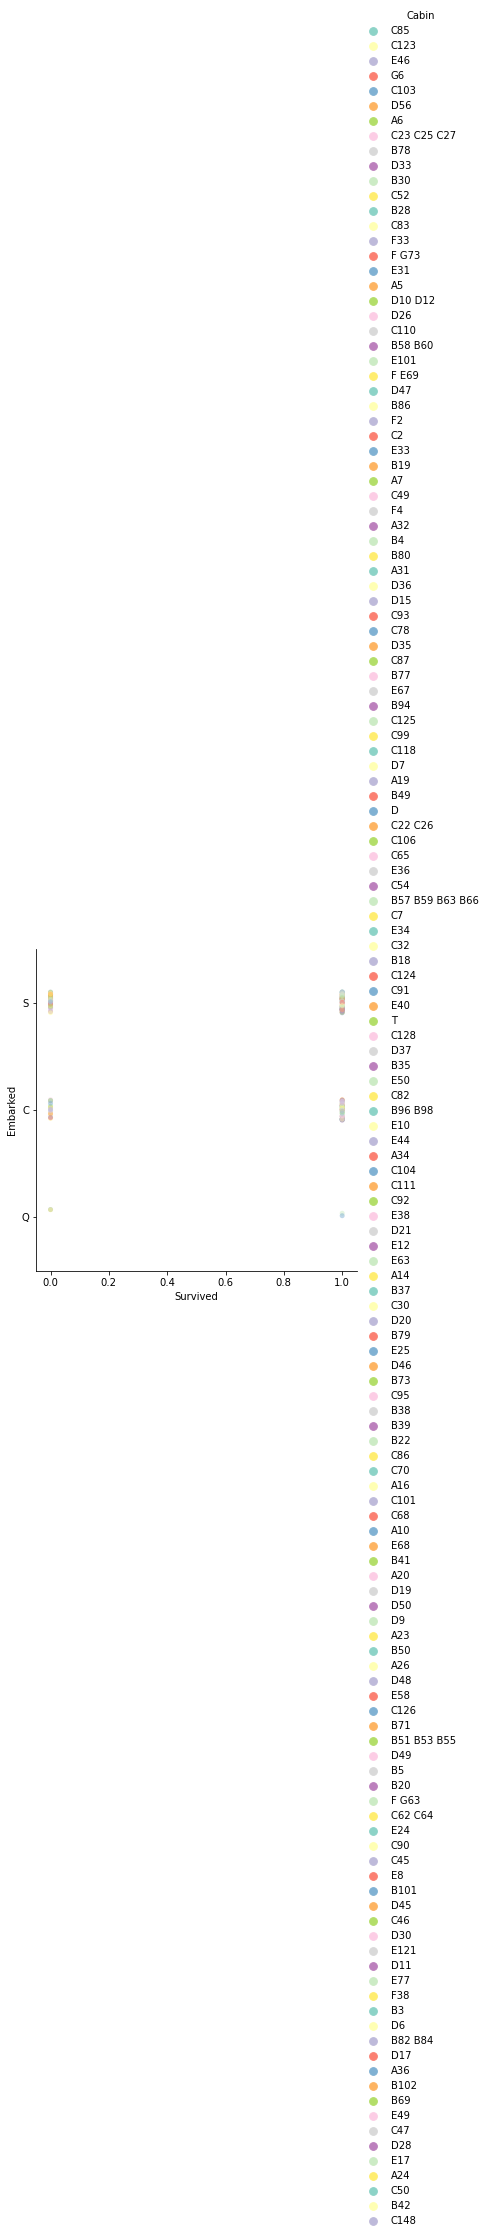

In [63]:
sn.catplot(x="Survived", y="Embarked", kind='strip',data=df, alpha=0.5, color='k', palette="Set3", hue="Cabin")

* Here we observe that majority of the Embarked are from Southampton, Cherbourg and those have equal No of survivors and non survivors

# Countplot

<AxesSubplot:xlabel='count', ylabel='Age'>

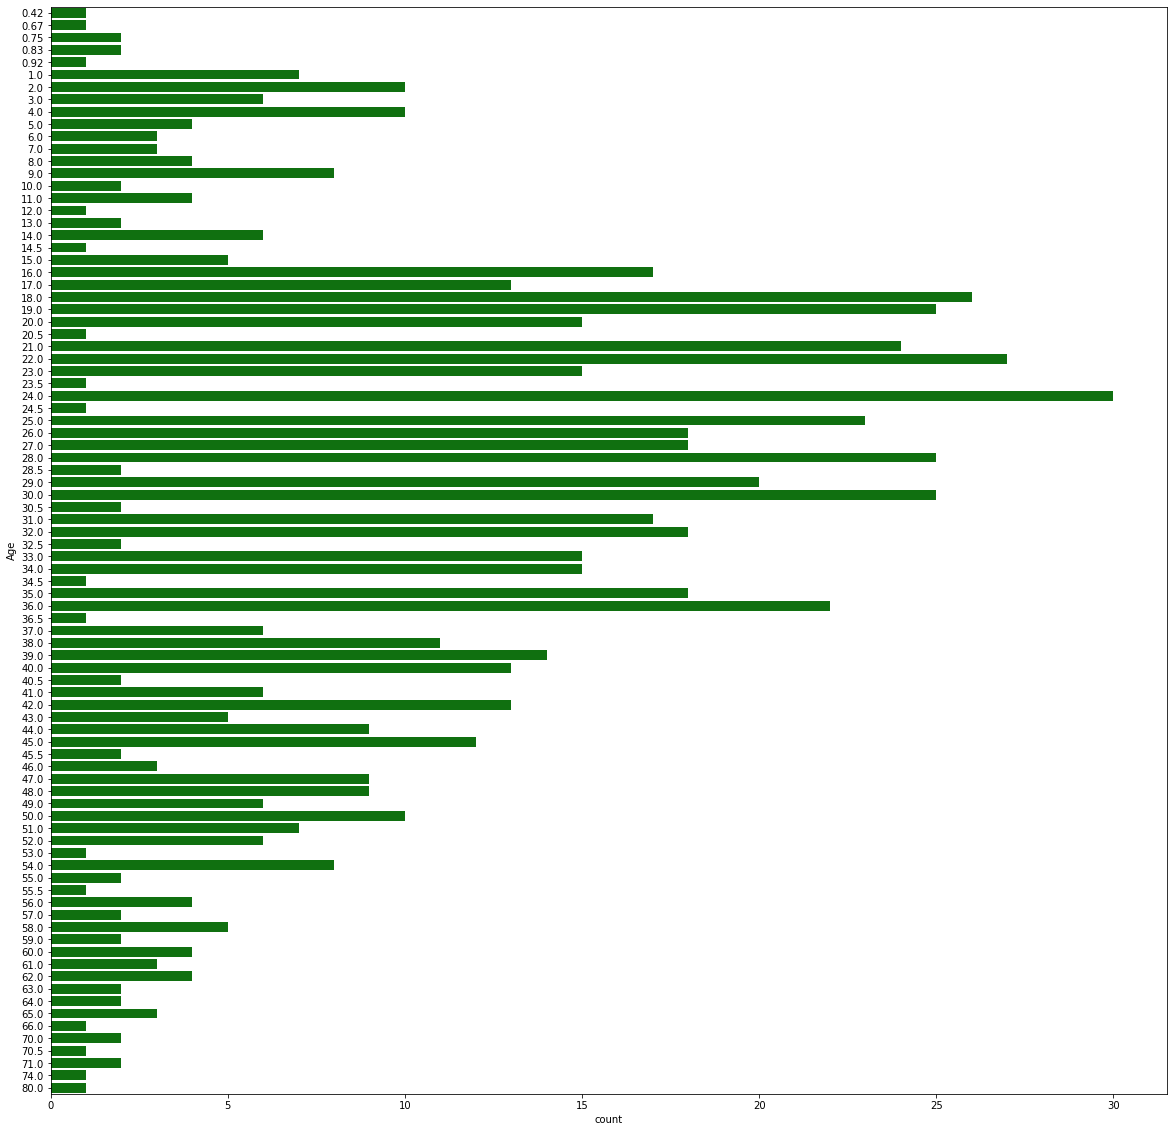

In [64]:
plt.figure(figsize=(20,20))

sn.countplot(y=df['Age'], data=df, color='g')

* Here we observe that there were majority of 24Yrs aged teenage people on board

<AxesSubplot:xlabel='count', ylabel='Fare'>

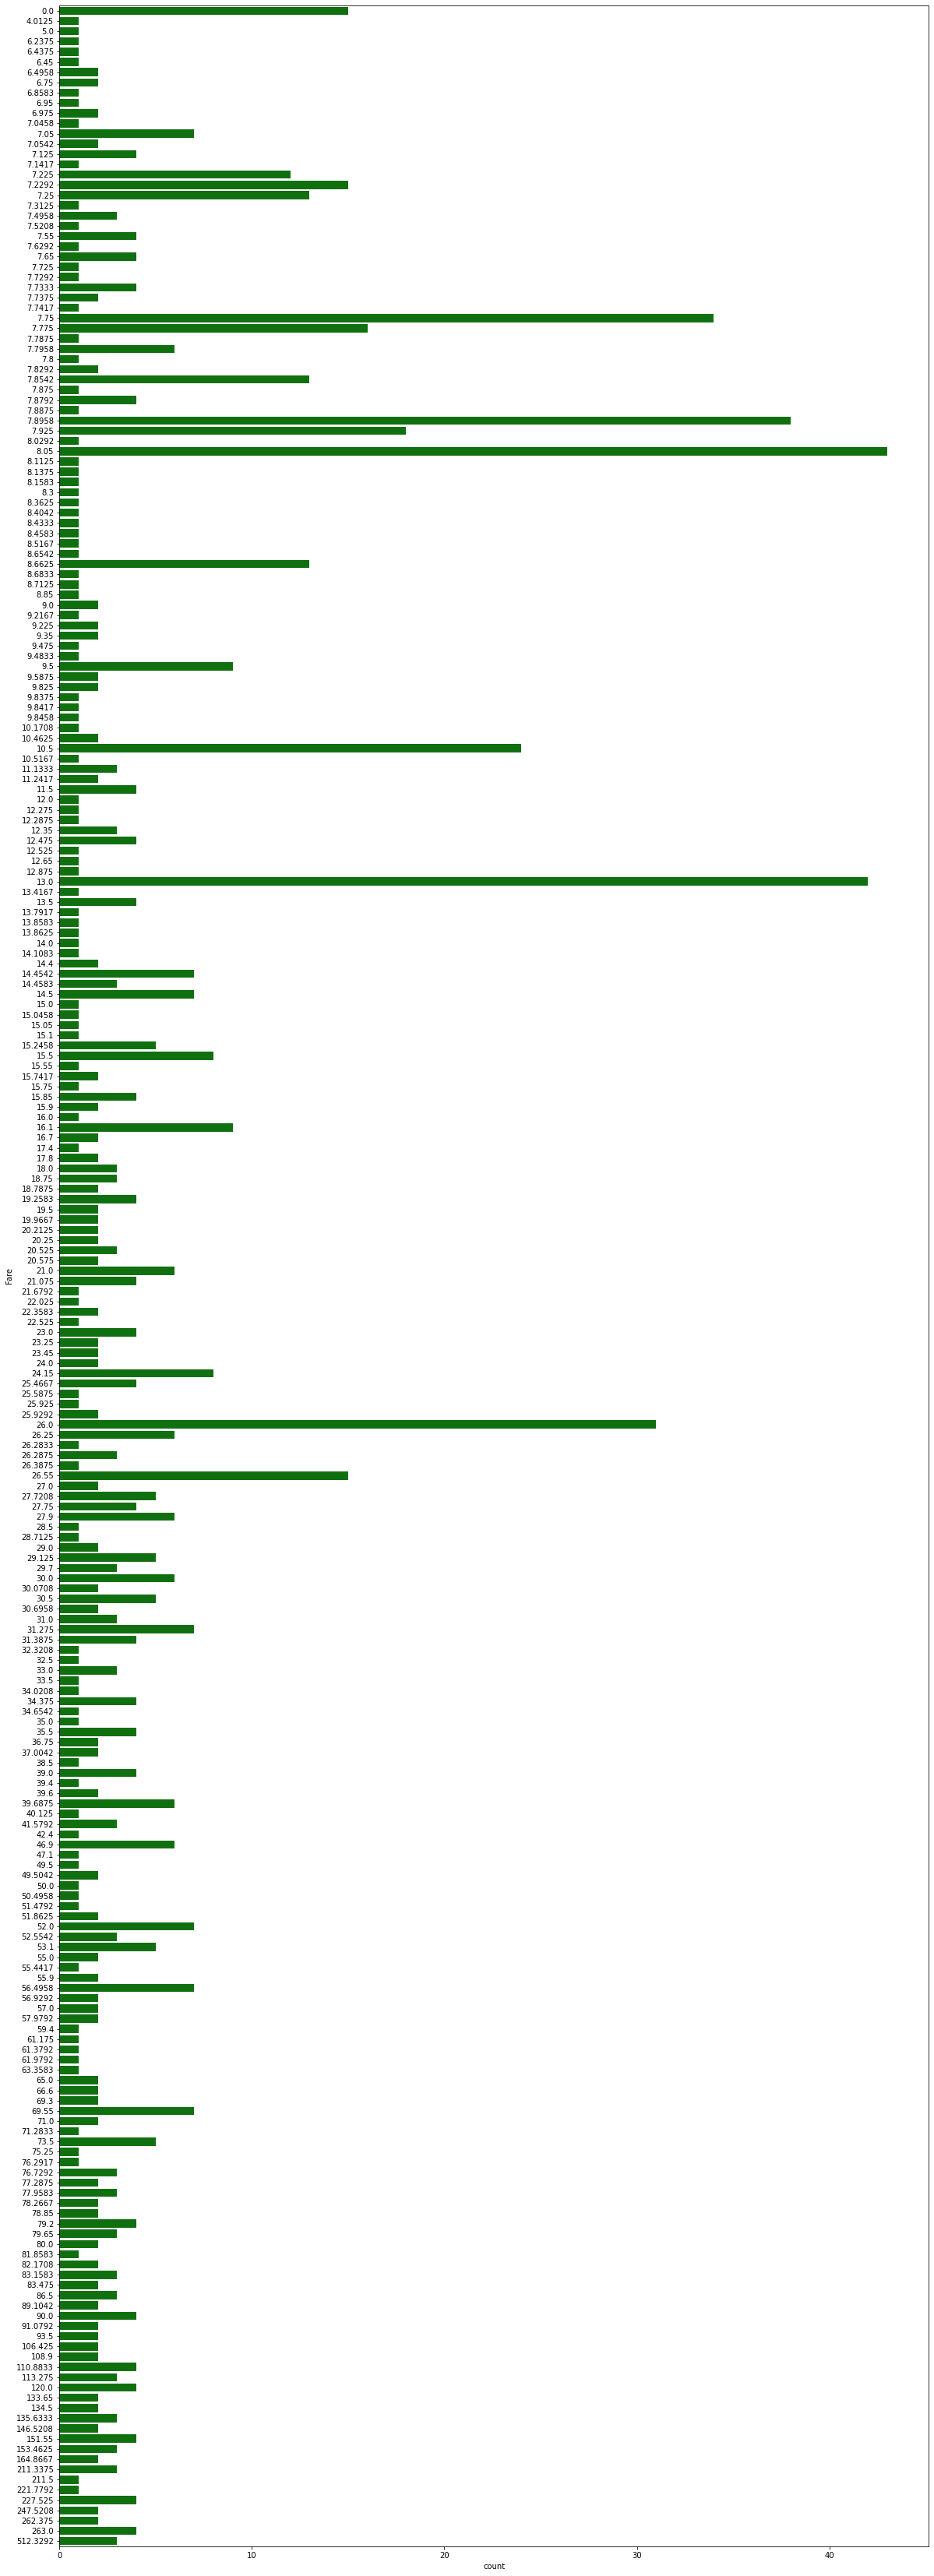

In [65]:
plt.figure(figsize=(20,60))

sn.countplot(y=df['Fare'], data=df, color='g')

* Here we observe that the Majority of Fare payed by the people were 8$ and 13$

<AxesSubplot:xlabel='count', ylabel='Cabin'>

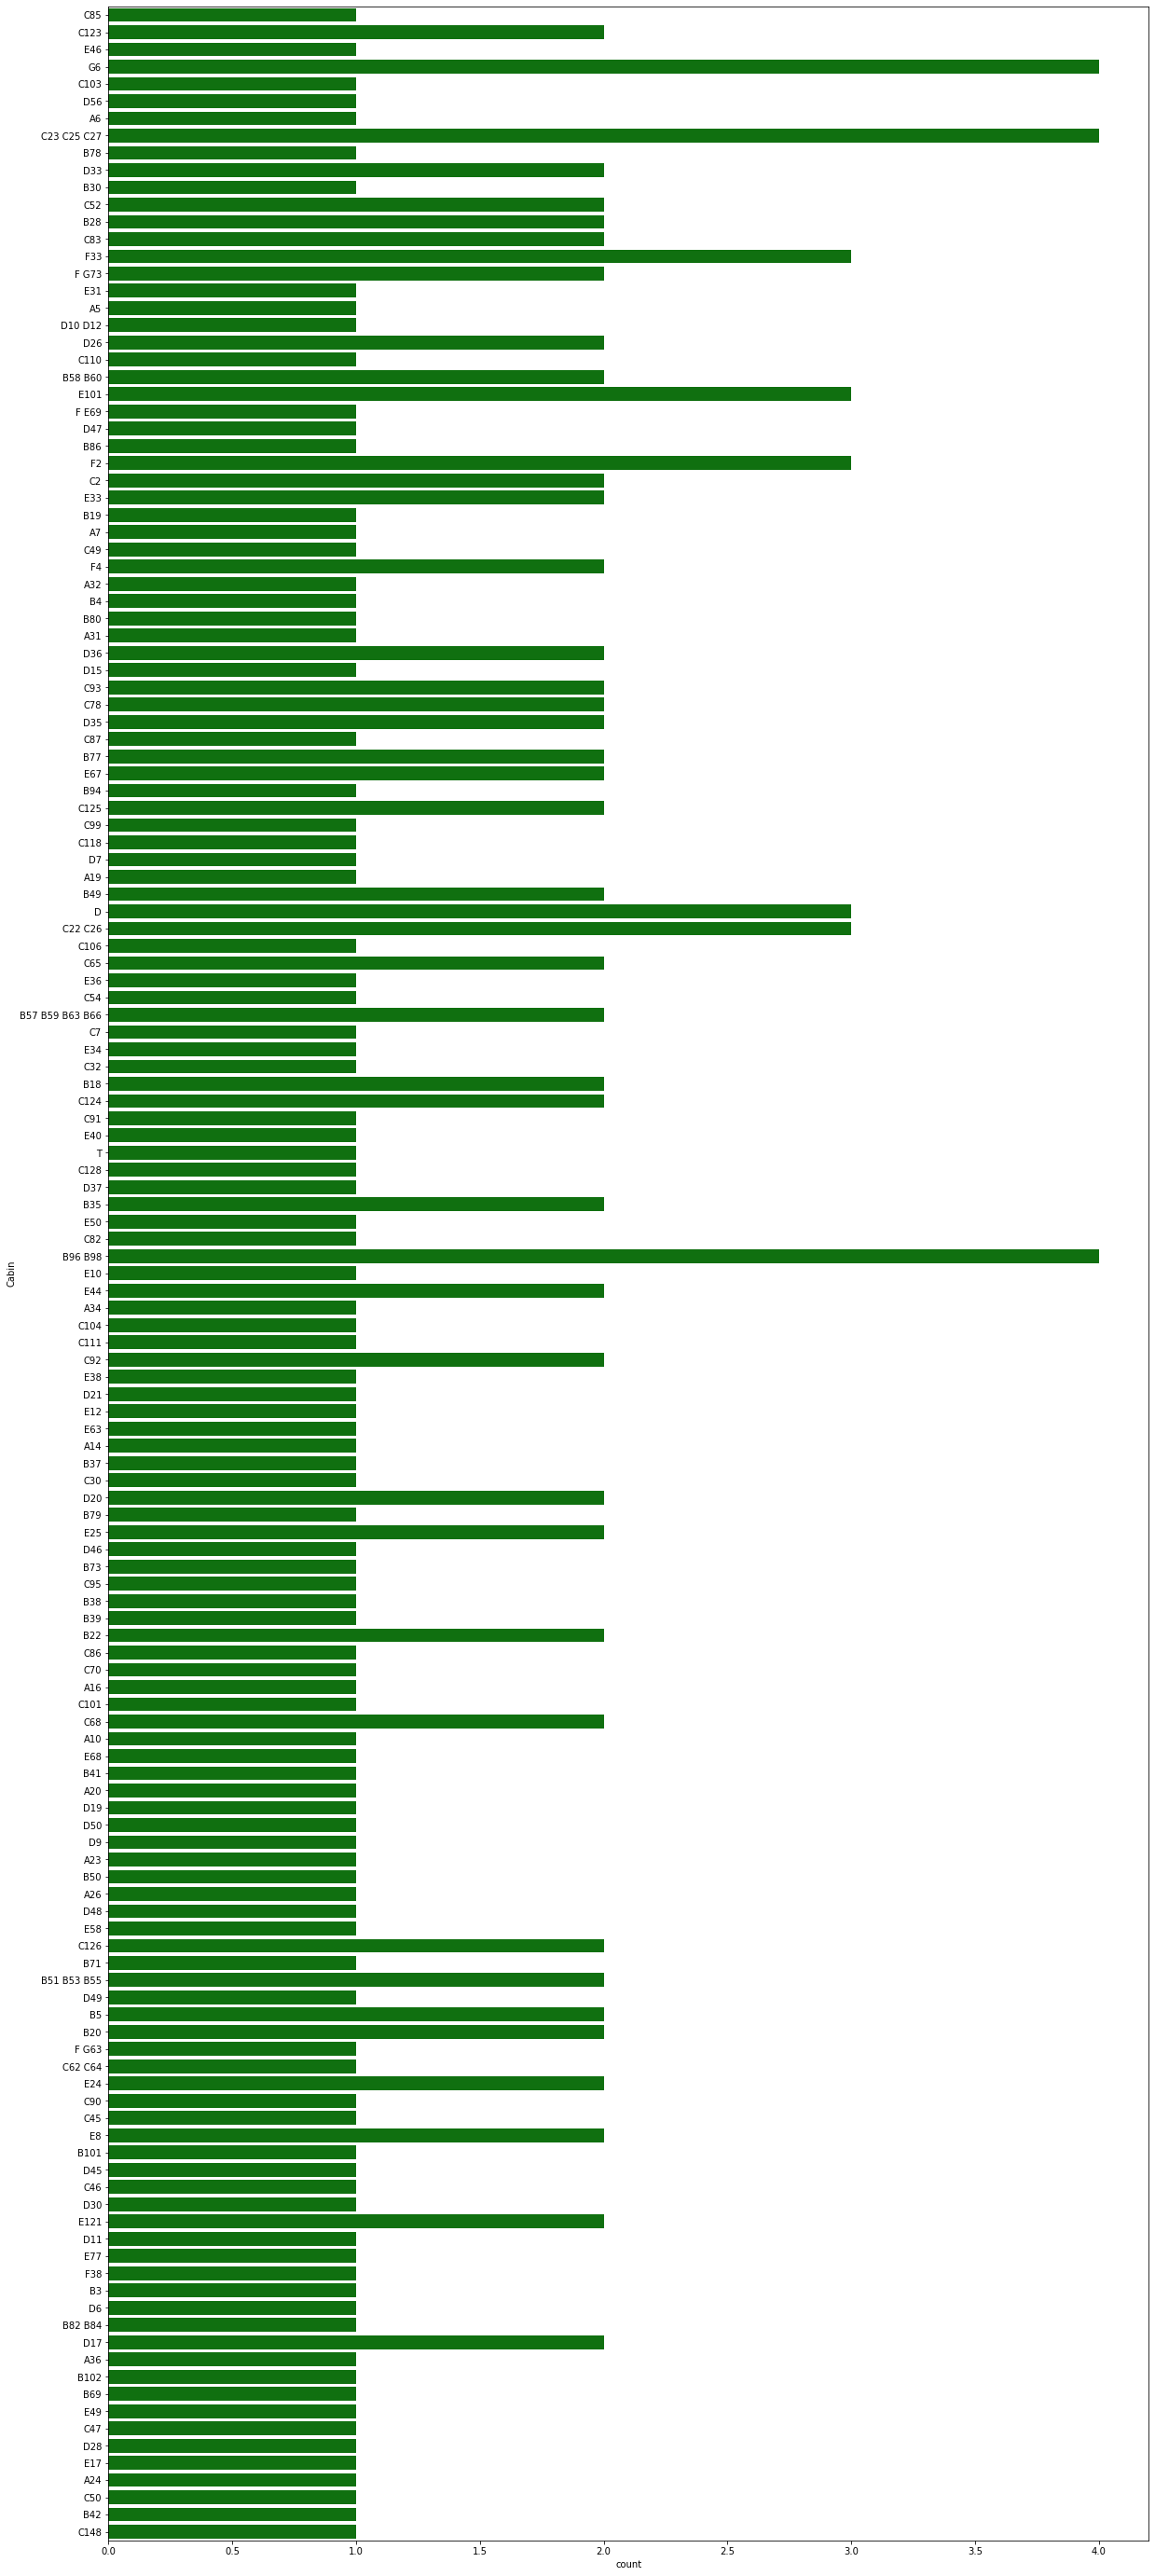

In [66]:
plt.figure(figsize=(20,50))

sn.countplot(y=df['Cabin'], data=df, color='g')

* Here we observe that Majority of the Booking on the type of cabin was ['B98', 'E46', 'C27']

In [67]:
# Since there are no major imbalances on Target Variable we do not perform Oversampling or Undersampling

In [68]:
new_df.describe()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,577.0,8.910000e+02,213.000000,891.000000,891.000000,8.910000e+02,891.000000
mean,446.000000,0.383838,13.253349,445.000000,1.0,-6.293839e+18,0.553991,338.528620,0.365107,-1.655804e+09,15.670836
std,257.353842,0.486592,7.732927,257.353842,0.0,4.296362e+18,0.498247,200.850657,0.113219,9.027957e+08,7.224192
min,1.000000,0.000000,2.718282,0.000000,1.0,-9.223372e+18,0.000000,0.000000,-0.000000,-2.147484e+09,1.000000
25%,223.500000,0.000000,7.389056,222.500000,1.0,-9.223372e+18,0.000000,158.500000,0.286000,-2.147484e+09,7.389056
50%,446.000000,0.000000,20.085537,445.000000,1.0,-9.223372e+18,1.000000,337.000000,0.368366,-2.147484e+09,20.085537
75%,668.500000,1.000000,20.085537,667.500000,1.0,0.000000e+00,1.000000,519.500000,0.483087,-2.147484e+09,20.085537
max,891.000000,1.000000,20.085537,890.000000,1.0,1.000000e+00,1.000000,680.000000,0.719728,1.000000e+00,20.085537


<AxesSubplot:>

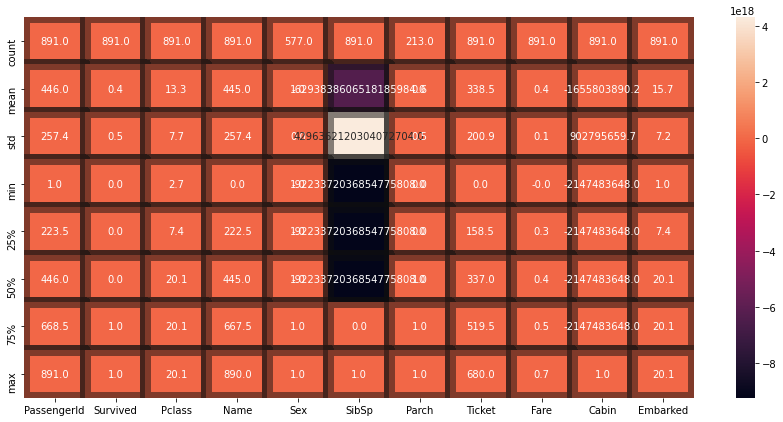

In [69]:
plt.figure(figsize=(15,7))
sn.heatmap(new_df.describe(), annot=True, linewidth=10, linecolor='#0f0f0f80', fmt='0.1f')

# Outcome of the Dataset Stats

# Total No of Rows and Columns are:
    891, 12

* PassengerID:
    mean=446.0
    std=257.3
    min=1.0
    max=891.0
    
* Survived:
    mean=0.38
    std=0.48
    min=0.00
    max=1.00
    
* Pclass:
    mean=13.25
    std=7.73
    min=2.71
    max=20.08
    
* Name:
    mean=445.0
    std=257.3
    min=0.00
    max=890.0
    
* Sex:
    mean=1.0
    std=0.0
    min=1.0
    max=1.0
    
* SibSp:
    mean=-6.29
    std=4.29
    min=-9.22
    max=1.00
    
* Parch:
    mean=0.55
    std=0.49
    min=0.00
    max=1.00
    
* Ticket:
    mean=338.5
    std=200.8
    min=0.00
    max=680.0
    
* Fare:
    mean=0.36
    std=0.11
    min=0.00
    max=0.71
    
* Cabin:
    mean=-1.65
    std=9.02
    min=-2.14
    max=1.00
    
* Embarked:
    mean=15.67
    std=7.22
    min=1.00
    max=20.08

# Scaling

* Since there are NaN values for some columns we perform median Transformation

In [71]:
new_df['Sex'].fillna(new_df.Sex.median(), inplace=True)
new_df['Parch'].fillna(new_df.Sex.median(), inplace=True)

new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,20.085537,108,1.0,22.0,1,1.0,523,0.504795,-2147483648,20.085537
1,2,1,2.718282,190,1.0,38.0,1,1.0,596,0.234375,0,2.718282
2,3,1,20.085537,353,1.0,26.0,-9223372036854775808,1.0,669,0.483087,-2147483648,20.085537
3,4,1,2.718282,272,1.0,35.0,1,1.0,49,0.251751,0,20.085537
4,5,0,20.085537,15,1.0,35.0,-9223372036854775808,1.0,472,0.479462,-2147483648,20.085537
5,6,0,20.085537,554,1.0,0,-9223372036854775808,1.0,275,0.468352,-2147483648,7.389056
6,7,0,2.718282,515,1.0,54.0,-9223372036854775808,1.0,85,0.253255,0,20.085537
7,8,0,20.085537,624,1.0,2.0,0,1.0,395,0.328075,-2147483648,20.085537
8,9,1,20.085537,412,1.0,27.0,-9223372036854775808,0.0,344,0.414948,-2147483648,20.085537
9,10,1,7.389056,576,1.0,14.0,1,1.0,132,0.293810,-2147483648,2.718282


In [72]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()

In [73]:
# To check for dimension
new_df.ndim

2

In [74]:
new_df['Pclass'].ndim

1

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(new_df):
    vif=pd.DataFrame()
    vif["F"] = new_df.columns
    vif["VIF_Value"] = [variance_inflation_factor(new_df.values, i)for i in range(new_df.shape[1])]
    return(vif)

F=new_df.iloc[:,:-1]
F.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,20.085537,108,1.0,22.0,1,1.0,523,0.504795,-2147483648
1,2,1,2.718282,190,1.0,38.0,1,1.0,596,0.234375,0
2,3,1,20.085537,353,1.0,26.0,-9223372036854775808,1.0,669,0.483087,-2147483648
3,4,1,2.718282,272,1.0,35.0,1,1.0,49,0.251751,0
4,5,0,20.085537,15,1.0,35.0,-9223372036854775808,1.0,472,0.479462,-2147483648


In [76]:
calculate_vif(F)

TypeError: '>=' not supported between instances of 'float' and 'str'